In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers
import pandas as pd
from sklearn import datasets, linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import time
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

import graphviz
import pydotplus
import openpyxl 
import matplotlib.pyplot as plt

In [9]:
path="C:\Project_619\PRELIM v1.3.xlsm"

wb= openpyxl.load_workbook('PRELIM v1.3.xlsm') 
  
# Get workbook active sheet object 
sheet= wb['Assay Inventory']

Properties= ['Sulfur','Nitrogen','API','Density','Hydrogen','MCR','Characterization Factor', 'Tb(50%) weight basis']

Location_dictionary = dict()

Location_dictionary['crude_name'] = []

for i in range (25,2185,15):
    cell= sheet.cell(row = i, column = 3) 
    Location_dictionary['crude_name'].append(cell.value)

# print(Location_dictionary)
Location_dictionary['crude_name']

['Access Western Blend_Crude Monitor',
 'Alaskan North Slope_Exxon',
 'Albian Heavy Synthetic_Crude Monitor_New',
 'Albian Heavy Synthetic_Crude Monitor_Old',
 'Albian Residual Blend_Crude Monitor',
 'Algerian Condensate_BP',
 'Angola Cabinda_Stratiev',
 'Angola Girassol_Exxon',
 'Angola Girassol_Statoil',
 'Angola Kuito_Chevron',
 'Arab Heavy_Stratiev',
 'Arab Light_Stratiev',
 'Arab Medium_Stratiev',
 'Azeri Light_Chevron',
 'Azeri light_Exxon ',
 'Azeri Light_Statoil',
 'Bakken_PNAS Laurenzi et al Bakken LCA',
 'Bakken_Various Sources',
 'Basrah Heavy_O&G',
 'Basrah Medium_COA',
 'Belridge_Knovel',
 'Bonny Light_Chevron',
 'Borealis Heavy Blend_Crude Monitor',
 'Bow River North_Crude Monitor_New',
 'Bow River North_Crude Monitor_Old',
 'Bow River South_Crude Monitor',
 'Brazil Frade_Chevron',
 'Brazil Lula_BG Group',
 'Brazil Polvo_BP',
 'Brent_BP',
 'Brent_Chevron',
 'Brent_Exxon',
 'Burgan (Wafra)_O&G',
 'Canada Hibernia_Chevron',
 'Canada Hibernia_Exxon',
 'Canada Hibernia_Statoi

In [10]:
wbo=pd.read_csv('Crude oils_updated.csv')  
# Ge​wbo=pd.read_csvt workbook active sheet object 

country=wbo.iloc[:,3]
len(country)

c = Counter(country)
c

Counter({'Canada': 53,
         'USA': 15,
         'Alegria': 1,
         'Angola': 4,
         'Saudi Arabia': 3,
         'Azerbaijan': 3,
         'Iraq': 4,
         'Nigeria': 8,
         'Brazil': 3,
         'UK': 6,
         'Kuwait': 4,
         'China': 3,
         'Colombia': 2,
         'Congo': 1,
         'Australia': 1,
         'Qatar': 2,
         'Ecuador': 1,
         'Norway': 6,
         'UAE': 4,
         'Venezuela': 4,
         'India': 1,
         'Indonesia': 3,
         'Iran': 2,
         'Mexico': 3,
         'Libya': 1,
         'Louisiana': 1,
         'Denmark': 1,
         'Russia': 3,
         'Kazakhstan': 1})

In [11]:
len(Location_dictionary['crude_name'])

144

In [12]:
Location_dictionary['crude_name'][0]

'Access Western Blend_Crude Monitor'

In [13]:
Location_dictionary['Sulfur']=[]

for j in range(31,2185,15):
      cell= sheet.cell(row = j, column = 5)
      Location_dictionary['Sulfur'].append(cell.value)

sul=Location_dictionary['Sulfur']
print(np.transpose(Location_dictionary['Sulfur']))
len(Location_dictionary['Sulfur'])

[4.19645003e+00 8.46315860e-01 2.58481761e+00 2.24227432e+00
 3.24210978e+00 5.88533578e-04 3.13651330e-01 3.12777273e-01
 3.52958165e-01 8.71157225e-01 2.32817701e+00 1.62805609e+00
 2.40164450e+00 1.48091217e-01 1.93083878e-01 1.50482547e-01
 9.70000000e-02 7.28706151e-02 8.13338624e+00 2.67509229e+00
 2.47007298e-01 1.69800000e-01 4.36334774e+00 3.11786788e+00
 2.69602215e+00 2.69329209e+00 8.00391225e-01 2.67902593e-01
 9.57060173e-01 3.36059135e-01 3.73902018e-01 5.61287040e-01
 3.43391348e+00 5.61733626e-01 6.19730984e-01 4.77897028e-01
 2.82134007e-01 4.02448963e+00 3.52032490e+00 5.23975010e-02
 4.01078133e+00 3.88522089e+00 6.41170872e-01 7.74717639e-01
 5.90152967e-02 9.74021341e-01 1.63861204e+00 1.06827727e-01
 2.40000000e-01 2.89286448e-01 9.49088287e-01 2.07880805e-01
 3.25222894e-01 2.42978962e-01 1.93079543e+00 7.47188191e-01
 8.49166504e-01 8.48801084e-01 3.10466366e+00 1.63046707e+00
 1.34798709e+00 5.89544360e-02 9.36766838e-02 1.45007658e-01
 2.38557678e-01 1.437610

144

In [14]:
Location_dictionary['Nitrogen']=[]
for j in range(32,2185,15):
      cell= sheet.cell(row = j, column = 5)
      Location_dictionary['Nitrogen'].append(cell.value)

N=Location_dictionary['Nitrogen']

print(np.transpose(Location_dictionary['Nitrogen']))
len(Location_dictionary['Nitrogen'])

[4.06208136e+03 9.08136080e+02 4.50937588e+03 2.58132987e+03
 2.23926255e+03 2.32470190e+00 1.57082293e+03 1.40911982e+03
 1.37828226e+03 5.00317053e+03 1.84954244e+03 1.40247320e+03
 1.65269673e+03 9.09646455e+02 1.04103756e+03 9.69178292e+02
 4.45000000e+02 0.00000000e+00 3.59009440e+01 1.98197284e+03
 8.38292467e+03 1.04000000e+03 4.15517383e+03 4.18125976e+03
 1.59610723e+03 1.63649289e+03 5.90567004e+03 1.11963024e+03
 3.13473974e+03 5.18555290e+02 7.56865414e+02 1.32897342e+03
 1.71955239e+02 1.05026215e+03 1.63780878e+03 8.64460404e+02
 4.25027426e+03 3.15612118e+03 2.33936577e+03 1.73902627e+02
 4.00030373e+03 2.20095192e+03 1.60632961e+03 2.18342328e+03
 1.53431229e+02 1.49786446e+03 1.76760174e+03 8.82048292e+02
 2.68000000e+02 1.77668476e+03 1.59413768e+03 1.03473795e+03
 1.73167068e+03 1.04814755e+03 1.73309450e+03 6.82703348e+02
 1.30312021e+03 8.70480585e+02 2.05061996e+03 2.90454233e+03
 7.93570284e+02 2.96856177e+02 3.49738544e+02 1.61552275e+03
 3.80686834e+03 5.525861

144

In [15]:
Location_dictionary['API']=[]
for j in range(33,2185,15):
      cell= sheet.cell(row = j, column = 5)
      Location_dictionary['API'].append(cell.value)
api=Location_dictionary['API']
print(np.transpose(Location_dictionary['API']))
len(Location_dictionary['API'])

[22.64       31.4        19.4        19.48134328 20.         68.43403691
 31.7        29.9        29.8057656  22.05000003 27.4        33.4
 28.5        36.08011113 36.1        34.8        42.4        38.4
 24.7        29.6        15.         32.710282   21.85       20.31
 21.09459459 22.77       19.8115606  29.3        20.26957327 37.42502987
 38.2        38.5        23.3        33.53068494 34.6        35.
 16.89682534 22.24       22.24       34.99       20.44       20.73007812
 29.3        23.6        47.3        36.35       41.8        43.10008939
 44.6        37.         29.2        38.41990084 38.40361189 38.41752081
 31.1        38.62437726 40.30925211 38.70396958 21.92       26.
 34.94130435 32.14       32.62820513 37.9        20.29067576 44.11907764
 26.9        31.         30.16192967 33.3        22.01       39.28929642
 18.29413086 31.4        24.20006729 35.7        37.86       37.1349283
 21.37       20.87276786 19.29       19.29       39.93       36.1
 50.33       32.649156

144

In [16]:
API_class=np.zeros(len(Location_dictionary['API']))
j=0
k=0
l=0
b=0
v=0
s=0

for i in range (0,144):
    if (Location_dictionary['API'][i]>32):
        if (Location_dictionary['Sulfur'][i]<=0.5):
            API_class[i]=1
            j+=1
        if (Location_dictionary['Sulfur'][i]>0.5):
            API_class[i]=2
            b+=1
    if (Location_dictionary['API'][i]>22 and Location_dictionary['API'][i]<=32):
        if (Location_dictionary['Sulfur'][i]<=0.5):
            API_class[i]=3
            k+=1
        if (Location_dictionary['Sulfur'][i]>0.5):
            API_class[i]=4
            v+=1
    if (Location_dictionary['API'][i]<=22):
        if (Location_dictionary['Sulfur'][i]<=0.5):
            API_class[i]=5
            l+=1
        if (Location_dictionary['Sulfur'][i]>0.5):
            API_class[i]=6
            s+=1
# print(API_class)
sum=j+b+k+v+l+s

print("Light and sweet,%d,\n Light and sour, %d \n Medium and sweet,%d,\n Medium and sour,%d,\n Heavy and sweet,%d,\n heavy and sour,%d",j,b,k,v,l,s)

print("sum",sum)

Light and sweet,%d,
 Light and sour, %d 
 Medium and sweet,%d,
 Medium and sour,%d,
 Heavy and sweet,%d,
 heavy and sour,%d 50 23 7 29 4 31
sum 144


In [17]:
Location_dictionary['Density']=[]
for j in range(34,2185,15):
      cell= sheet.cell(row = j, column = 5)
      Location_dictionary['Density'].append(cell.value)

print(np.transpose(Location_dictionary['Density']))
len(Location_dictionary['Density'])

[917.09239977 868.6        936.7834493  936.27874428 933.07341584
 707.1        867.         876.7        876.7        920.6162323
 890.         858.         884.         843.54057022 843.44046838
 850.52004373 813.68602645 832.09745438 905.07911332 878.3
 966.         860.8383     921.81690577 931.16805546 926.38027497
 916.31958579 934.2354407  880.2        931.5        836.9
 830.         831.53307353 913.26458333 856.57174938 851.05732992
 849.42052107 952.58521993 919.47848641 919.6        849.06374257
 930.37134724 928.59850196 880.         912.         790.67873322
 843.1        816.5        809.61298754 803.52072686 839.8
 881.         832.         832.00481099 832.40042846 870.5
 831.         822.77654297 831.00090077 921.39631404 898.4
 849.31215274 863.85127414 861.28171809 835.3        931.28660105
 805.         893.3        870.8        874.5        859.
 920.85611687 857.         943.69934047 869.         907.90341302
 846.3        834.67538085 838.26       924.7113397  9

144

In [18]:
Location_dictionary['Hydrogen']=[]
for j in range(35,2185,15):
      cell= sheet.cell(row = j, column = 5)
      Location_dictionary['Hydrogen'].append(cell.value)

h=Location_dictionary['Hydrogen']
print(np.transpose(Location_dictionary['Hydrogen']))
len(Location_dictionary['Hydrogen'])

[11.74151585 12.81432004 11.39010061 10.71895231 11.12016655 15.42606854
 13.14206488 12.81102874 12.14071068  9.04411843 12.62276165 13.01188416
 12.66742343 12.72138306 13.34       12.62755927 13.6        13.31737603
 11.25974476 12.44459037 10.62207716 12.93164891 11.64986374 11.43029027
 11.64129054 11.83012004  7.95435464 12.74005473 11.10502668 13.07926381
 12.99665093 12.13569853 11.52731093 12.79208488 11.79116989 12.28751638
  9.57102389 11.74042655 12.09441938 12.63066409 12.81259672 11.1922951
 12.99506601 12.13568498 13.71818713 13.22949649 13.21425117 14.15475736
 14.         13.22763203 12.64327842 13.15698226 10.82023246 12.43929452
 12.62374557 12.94060841 10.61330351 12.26782971 11.78759692 13.82936855
 12.82090896 12.62697055 12.86516103 13.44136207  8.16529509 13.30881924
 12.15853624 12.85759909 12.52197133 13.14307215 11.77656728 12.33278382
  8.20932876 12.89959783  8.63444727 13.17216051 12.92745412 12.3165613
 11.74992316 11.20672442 11.37886335 11.37886335 13.1

144

In [19]:
Location_dictionary['MCR']=[]
for j in range(36,2185,15):
      cell= sheet.cell(row = j, column = 5)
      Location_dictionary['MCR'].append(cell.value)

mcr=Location_dictionary['MCR']
print(np.transpose(Location_dictionary['MCR']))
len(Location_dictionary['MCR'])

[1.05500000e+01 4.86000000e+00 1.37000000e+01 1.09007826e+01
 8.14600000e+00 1.00000000e-03 3.60000000e+00 3.03000000e+00
 3.20000000e+00 6.14000000e+00 6.80000000e+00 3.60000000e+00
 5.90000000e+00 1.30000000e+00 1.40000000e+00 1.40000000e+00
 7.00000000e-01 7.50000000e-01 9.32000000e+00 6.40000000e+00
 5.90000000e+00 1.20000000e+00 1.02300000e+01 1.12400000e+01
 8.57258278e+00 8.45000000e+00 6.04000000e+00 3.24000000e+00
 8.60000000e+00 2.27000000e+00 2.04000000e+00 2.18000000e+00
 7.70000000e+00 2.61000000e+00 1.71000000e+00 2.20000000e+00
 8.00000000e+00 1.02200000e+01 1.05500000e+01 1.00000000e-02
 1.04500000e+01 1.06270053e+01 3.30000000e+00 7.57000000e+00
 2.33000000e+00 1.20000000e+00 1.70000000e+00 1.08240215e-02
 6.50000000e-01 2.11000000e+00 6.30000000e+00 1.71000000e+00
 1.83000000e+00 1.80000000e+00 4.62000000e+00 1.94000000e+00
 1.55000000e+00 1.80000000e+00 9.19000000e+00 7.10000000e+00
 3.79659091e+00 2.00000000e-02 6.04166667e-02 1.20000000e+00
 8.00000000e+00 2.740000

144

In [20]:
Location_dictionary['CF']=[]
for j in range(37,2185,15):
      cell= sheet.cell(row = j, column = 5)
      Location_dictionary['CF'].append(cell.value)

print(np.transpose(Location_dictionary['CF']))
len(Location_dictionary['CF'])

[12.07865782 11.67046916 11.775354   11.63910626 11.48875019 14.79773985
 12.35643647 12.09971619 12.00077964 12.37116341 12.08928738 12.10837652
 11.99476202 12.17209444 12.50103736 12.17842901 11.8        11.98971186
 11.56084777 11.92351201 12.03746321 11.70015349 12.00932485 11.88205051
 11.64927344 11.77610362 12.1908176  11.77565475 11.87078944 12.13263576
 12.16218391 12.48286239 11.45722942 12.79273421 12.19649084 12.12696721
 11.75909745 11.98138501 11.85979659 11.62308408 11.99666362 11.78797253
 12.02436271 12.31636317 13.23354405 11.98611683 12.33920828 11.92109357
 12.4        12.03253313 11.86276177 12.47698082 12.83252922 12.16893958
 12.00301845 12.07746089 12.682839   12.0831113  11.79497104 11.47145547
 12.04532541 11.87728856 11.91310753 11.95442725 12.5666916  11.3345479
 11.93420579 11.99563652 12.05812544 12.03595384 12.08702003 12.64064697
 12.308132   12.21216708 12.59498327 12.07699389 11.94870583 11.98304915
 12.01398107 11.80787228 11.79887651 11.79887651 12.

144

In [21]:
Location_dictionary['Tb']=[]
for j in range(38,2185,15):
      cell= sheet.cell(row = j, column = 5)
      Location_dictionary['Tb'].append(cell.value)

tb=Location_dictionary['Tb']
# Location_dictionary['Tb'] = Location_dictionary['Tb'][:-1]
print(np.transpose(Location_dictionary['Tb']))
len(Location_dictionary['Tb'])

[484.21771043 305.61       474.76287761 447.934      413.25
 365.         410.         390.         375.         550.
 420.         350.         390.         330.         380.
 345.         259.         280.         365.         365.
 600.         296.18836686 482.81423849 481.54219069 427.13670886
 426.94541226 550.         345.         480.         310.
 306.26       350.         365.         460.         350.
 335.         510.         471.85168711 449.4        262.39564543
 501.60055049 457.67391304 385.         515.         365.
 300.         295.         227.82       262.         300.
 360.         350.         405.         305.         360.
 290.         360.         290.         442.07307277 335.
 323.43055556 328.68899731 328.74722222 280.         620.
 150.         400.         360.         380.         340.
 495.17422204 365.         600.         390.         560.
 320.         279.59762764 291.6        490.84558338 459.31973684
 480.90176017 480.90176017 274.16890446 300.  

144

In [22]:
# Location_dictionary['crude_name']=[s,N,a,h,mcr,cf,tb]
# Location_dictionary['crude_name'][0]

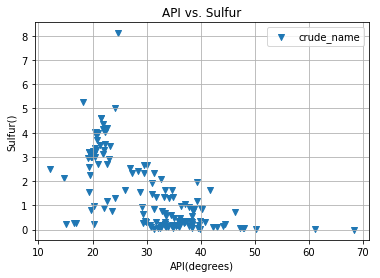

In [23]:
plt.scatter(api,sul,marker='v', label='crude_name')
plt.xlabel('API(degrees)')
plt.ylabel('Sulfur()')
plt.title("API vs. Sulfur")
plt.legend(loc='upper right')
plt.grid()

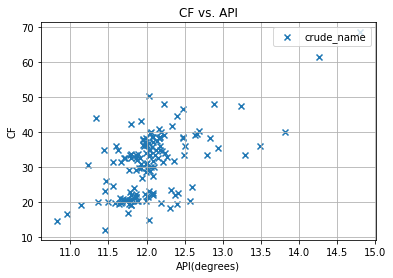

In [24]:
cf=Location_dictionary['CF']
plt.scatter(cf,api,marker='x', label='crude_name')
plt.xlabel('API(degrees)')
plt.ylabel('CF')
plt.title("CF vs. API")
plt.legend(loc='upper right')
plt.grid()

In [25]:
X_data=np.array([api,sul])
X_data=X_data.T
print(X_data.shape)

# for n in range (1,5):
#     start[n] = time.time()
cl=KMeans(n_clusters=3, n_init=10, tol=0.0001, random_state=10)
cl.fit(X_data)

# user_input=np.array([[20,0.7]])
# print(cl.predict(user_input))

# calcul=np.zeros(144)

# def apis(api,sul):
#     for i in range (0,144):
# #     if(cl.predict==1):
#         calcul[i]=((api[i]-user_input[0,0])**2 + (sul[i]-user_input[0,1])**2)**0.5
#     return api and sul for (calcul.min())


# iner=cl.inertia_
# print(iner)

(144, 2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [26]:
#DBSCAN

H_db=np.zeros(10)
C_db=np.zeros(10)
F_db=np.zeros(10)
Abs=np.zeros(10)

X_data=np.array([api,sul,cf])
X_data=X_data.T

# for n in range (10,95):
db = DBSCAN(eps=2.5, min_samples=3)
db.fit(X_data)
#     H_db[n]=metrics.homogeneity_score(X_target,db.labels_)  #Homogeneity
#     C_db[n]=metrics.completeness_score(X_target,db.labels_)
#     F_db[n]=metrics.fowlkes_mallows_score(X_target,db.labels_)

# Number of clusters in labels, ignoring noise if present.
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters for API,S,N: %d' % n_clusters_)
print('Estimated number of noise points for API, S, N: %d' % n_noise_)



Estimated number of clusters for API,S,N: 2
Estimated number of noise points for API, S, N: 4


### iner

# np.count(cl.labels_==0)

In [76]:
# #PCA
# print(__doc__)

# from time import time
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn import metrics
# from sklearn.cluster import KMeans
# from sklearn.datasets import load_digits
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale

# # np.random.seed(42)
# data=np.array([a,tb,N,h,mcr,cf,tb])
# data=data.T


# # digits = load_digits()
# # data = scale(digits.data)

# n_samples, n_features = X_data.shape
# # n_digits = len(np.unique(digits.target))`
# # labels = digits.target

# sample_size = 144

# print("\t n_samples %d, \t n_features %d"
#       % (n_samples, n_features))


# print(82 * '_')
# print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


# def bench_k_means(estimator, name, data):
#     t0 = time()
#     estimator.fit(data)
#     print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
#           % (name, (time() - t0), estimator.inertia_,
#              metrics.homogeneity_score(labels, estimator.labels_),
#              metrics.completeness_score(labels, estimator.labels_),
#              metrics.v_measure_score(labels, estimator.labels_),
#              metrics.adjusted_rand_score(labels, estimator.labels_),
#              metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
#                                                 average_method='arithmetic'),
#              metrics.silhouette_score(data, estimator.labels_,
#                                       metric='euclidean',
#                                       sample_size=sample_size)))

# bench_k_means(KMeans(init='k-means++', n_clusters=3, n_init=10),
#               name="k-means++", data=data)

# bench_k_means(KMeans(init='random', n_clusters=3, n_init=10),
#               name="random", data=X_data)

# # in this case the seeding of the centers is deterministic, hence we run the
# # kmeans algorithm only once with n_init=1
# pca = PCA(n_components=7).fit(data)
# bench_k_means(KMeans(init=pca.components_, n_clusters=3, n_init=1),
#               name="PCA-based",
#               data=data)
# print(82 * '_')

# # #############################################################################
# # Visualize the results on PCA-reduced data

# reduced_data = PCA(n_components=2).fit_transform(data)
# kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
# kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1)
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# plt.title('K-means clustering on the oil assay dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()

In [77]:
api=np.array(Location_dictionary['API'])
sulfur=np.array(Location_dictionary['Sulfur'])

In [78]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

81 52 11
(133,)
(144,)


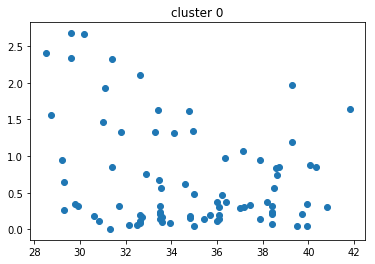

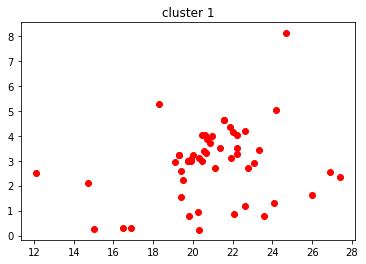

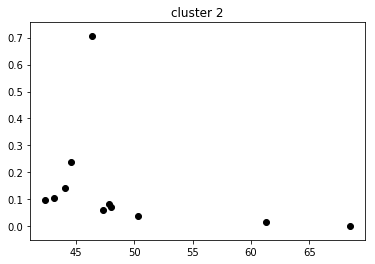

In [79]:
x0=api[cl.labels_==0]
x1=api[cl.labels_==1]
x2=api[cl.labels_==2]
print(len(x0),len(x1), len(x2))
x01=np.append(x0,x1)
print(np.shape(x01))

x012=np.append(x01,x2)
print(np.shape(x012))

y0=sulfur[cl.labels_==0]
y1=sulfur[cl.labels_==1]
y2=sulfur[cl.labels_==2]

y01=np.append(y0,y1)
y012=np.append(y01,y2)

# fig, axs = plt.subplots(2, 2)
# axs[0, 0].scatter(x0, y0)
# axs[0, 0].set_title('cluster0')
# axs[0, 1].scatter(x1, y1, 'tab:orange')
# axs[0, 1].set_title('Axis [0,1]')
# axs[1, 0].plot(x2, y2, 'tab:green')
# axs[1, 0].set_title('Axis [1,0]')

plt.figure(1)
plt.title("cluster 0")
plt.scatter(x0,y0)

plt.figure(2)
plt.title("cluster 1")
plt.scatter(x1,y1,color='red')

plt.figure(3)
plt.title("cluster 2")
plt.scatter(x2,y2,color='black')


# fig = make_subplots(rows=1, cols=3)

# fig.add_trace(go.Scatter(x0, y0,row=1, col=1)

# fig.add_trace(go.Scatter(x1, y1,row=1, col=2)
              
# fig.add_trace(go.Scatter(x2, y2,row=1, col=3)              

# fig.update_layout(height=600, width=800, title_text="Subplots")
# fig.show()


In [82]:
grid.cv_results_['mean_test_score']

array([-0.86751704, -4.7601552 ])

(133, 1)
(133, 1)
3.1295761511292404
{'fit_intercept': True}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



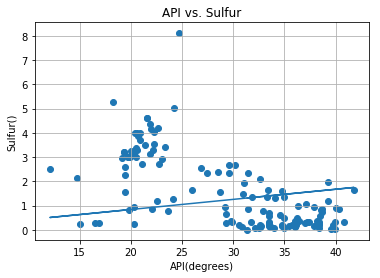

In [80]:
x_r=np.array([x01]).T
print(x_r.shape)
y_r=np.array([y01]).T
print(y_r.shape)

reg = LinearRegression(fit_intercept=False)
reg.fit(x_r,y_r)
ypred = reg.predict(x_r)
m=mean_squared_error(ypred,y_r)
print(m)

model = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(x_r, y_r)

print(grid.best_params_)

plt.scatter(x01,y01)
plt.xlabel('API(degrees)')
plt.ylabel('Sulfur()')
plt.title('API vs. Sulfur')

plt.plot(x01,ypred)
plt.grid()
# plt.scatter(x_r,ypred,color='b',label='Linear')

# x_2=x_r**2
# ones=np.ones(len(x_r))

# x2=(x_2,x_r,ones)

# reg_2=LinearRegression(fit_intercept=False)
# reg_2.fit(x2,y_r)
# ypred = reg_2.predict(x2)
# m=mean_squared_error(ypred,y_r)*144
# print(m_2)

# A=np.dot(np.linalg.inv(np.dot(x2,np.transpose(x2))),np.dot(x2,np.transpose(y_r)))

# Y_est=np.dot(A,x2)

# np.sum((y_r-Y_est)**2)

Text(0.5, 1.0, 'API vs. Sulfur')

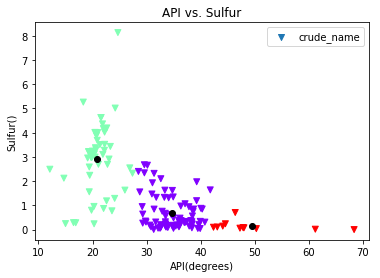

In [81]:
x=Location_dictionary['API']
# print(np.shape(x))
y=Location_dictionary['Sulfur']
plt.figure(1)
plt.scatter(x,y,marker='v', label='crude_name',c=cl.labels_, cmap='rainbow')
plt.scatter(cl.cluster_centers_[:,0],cl.cluster_centers_[:,1], c='black')
plt.xlabel('API(degrees)')
plt.ylabel('Sulfur()')
plt.title('API vs. Sulfur')
plt.legend(loc='upper right')


# print(np.shape(x))​plt.xlabel('API(degrees)')
plt.ylabel('Sulfur()')
plt.title('API vs. Sulfur')
# plt.figure(2)
# x=[]
# for i in range(0,145):
#     if (cl.labels_[i]==0):
# #       plt.figure(2)
#         plt.scatter (x[i],y[i])        
#         a[j].append(x,y)
#         j+=1
# #     i=0
#     if (cl.labels_[i]==1):
#         plt.figure(3)
#         plt.scatter (x[i],y[i]
#         b=b+1             
#     i=0
#     if (cl.labels_[i]==2):
#         plt.figure(3)
#         plt.scatter (x[i],y[i]
# a           

In [34]:
cl.cluster_centers_

array([[34.74973517,  0.68534936],
       [20.88622196,  2.90466448],
       [49.44240262,  0.14218571]])

In [35]:
X_all=np.array([N,h,api,sul,tb,cf,mcr])
X_all.shape
# API_class.shape,h,m,tb,cf

(7, 144)

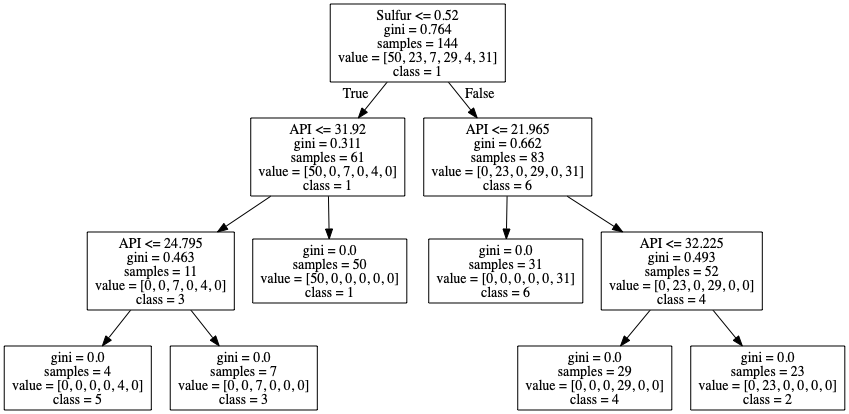

In [36]:
#Decission Tree

X_all=np.array([sul,N,h,mcr,tb,cf,api]).T

# We Create an instance of Neighbors Classifier and fit the data

cltree=DecisionTreeClassifier(splitter='best', max_depth=3, min_impurity_decrease=0.01)

#Train the model
model =cltree.fit(X_all,API_class)

feature_names=np.array(['Sulfur', 'N', 'hydrogen', 'MCR', 'Tb ', 'charac factor', 'API'])
class_names=np.array(['1','2','3','4','5','6'])

dot_data=tree.export_graphviz(cltree, out_file=None,feature_names=feature_names, class_names= class_names)

# Draw Graph
graph= pydotplus.graph_from_dot_data(dot_data)

# Show Graph
Image(graph.create_png())


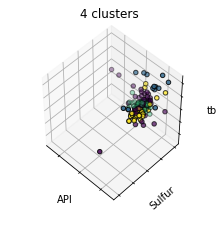

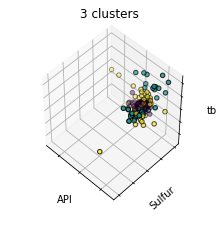

In [34]:
x=Location_dictionary['API']
y=Location_dictionary['Sulfur']
X_data=np.array([x,y,tb]).T
X=X_data
estimators = [('k_means_iris_4', KMeans(n_clusters=4)),
              ('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = ['4 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(3, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('API')
    ax.set_ylabel('Sulfur')
    ax.set_zlabel('tb')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1